## Task 1 : Prediction percentage of student based on no. of hours study using Supervised ML algorithm

## Author- Vishal Nagar

### THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS

In [1]:
#Importing libraries required in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from link
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Information about data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Statical information about data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Correlation with each other  
df.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Visualization

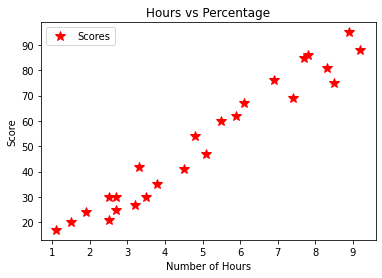

In [7]:
df.plot(x='Hours', y='Scores', style='*',color='red',markersize=10)  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of Hours')  
plt.ylabel('Score')  
plt.show()

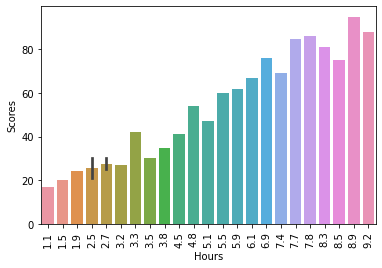

In [8]:
sns.barplot(x='Hours',y='Scores',data=df)
plt.xticks(rotation=90)
plt.show()

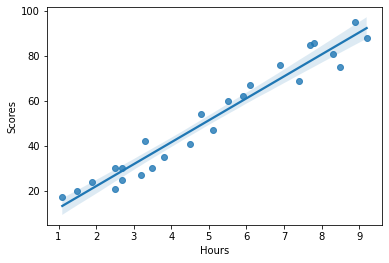

In [22]:
sns.regplot(x,y)
plt.show()

In [9]:
#Divide the into in x and y column
x=df['Hours']
y=df['Scores']

In [10]:
from sklearn.model_selection import train_test_split

##### Split the data into training and testing sets

In [11]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train,x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

##### Importing model then training the Model

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit((np.array(x_train)).reshape(-1,1), y_train)

LinearRegression()

In [13]:
#checking shape
x_train.shape , x_test.shape,y_train.shape, y_test.shape

((17,), (8,), (17,), (8,))

##### Best fit line plot

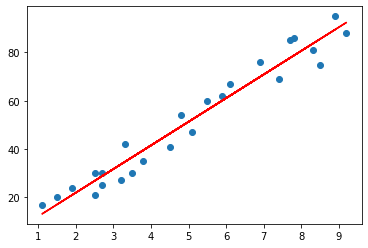

In [26]:
y_hat= regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, y_hat, color='red')
plt.show()

##### Testing the model

In [14]:
y_pred = regressor.predict(np.array(x_test).reshape(-1,1))
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [36]:
#Comparing the Real Results with the Predicted One
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


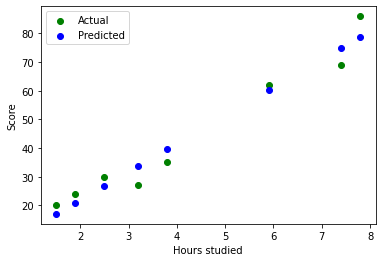

In [38]:
plt.scatter(x_test,y_test,color='g')
plt.scatter(x_test,y_pred,color='b')
plt.legend(["Actual",'Predicted'])
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

#### Evaluating Performormce of the model

In [15]:
from sklearn import metrics

In [33]:
Absolute_error = metrics.mean_absolute_error(y_test,y_pred)
Squared_error = metrics.mean_squared_error(y_test,y_pred)
print('The mean absolute error is {} ' .format(Absolute_error))
print('The mean squared error is {} ' .format(Squared_error))

The mean absolute error is 4.419727808027652 
The mean squared error is 22.96509721270043 


In [35]:
input_hours = 9.25
predicted_score = regressor.predict(np.array(input_hours).reshape(-1,1))
print("Number of Hours Studied is {}".format(input_hours))
print("Predicted Score is {}".format(predicted_score[0]))

Number of Hours Studied is 9.25
Predicted Score is 92.91505723477056


# Thank you